# Import packages

In [1]:
#Import packages
import numpy as np
import torch
import pickle
import scipy.interpolate
import math
import time
from scipy.integrate import quad
import Krylov
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from IPython.display import clear_output
import os.path
import tikzplotlib as tikz

# Initialise variables for the Schrodinger problem

Here we generate:
- the time step $\tau$
- the number of grid points $N$
- the number of time steps $n$
- the time grid $t$
- the spatial grid $x$
- the Krylov subspace dimension $m$
- the time-independent part of the Hamiltonian $A=-\mathrm{i}(-\nabla + V_0(x))$
- the initial vector $v = u_0$

### Functions to generate the Hamiltonian, initial vector, and spatial grid

In [ ]:
#Functions to generate variables
def absorbing(L,boundarywidth,a,x):
    b = [[0,0],[10,0],[12.480605508822585, -0.025158792783650075],
    [13.245010702282347, -0.03257908601267223],
    [14.009483537430615, -0.026268116475135272],
    [14.77405107094279, -0.000733379064415729],
    [15.538665953636922, 0.03441324228289511],
    [16.303328185513003, 0.07917174756679768],
    [17.067983653220235, 0.12255712657404416],
    [17.83243619586195, 0.12474871728161308],
    [18.596604643411943, 0.06926900436963357],
    [19.360502524207917, -0.0411357596085824],
    [20.12440040500389, -0.1515405235867986],
    [20.88860943756699, -0.19878147883884245],
    [21.653305490287323, -0.14715734217166054],
    [22.41842768564524, -0.009026250075155673],
    [23.183536352665456, 0.12635858946803724],
    [23.948266226230043, 0.1848483575184987],
    [24.71245496628659, 0.1334880234364868],
    [25.47625814871866, 0.0038594915850880263],
    [26.24013573700808, -0.11066465122309577],
    [27.292474204857513, -0.11267650830120823],
    [28.117179064690163, 0.028656934591100747],
    [28.88222009002188, 0.15031051136773455],
    [29.646794387702897, 0.17721837505511018],
    [30.410800495200483, 0.08878363150338853],
    [31.174508979268644, -0.06006866822119328],
    [31.938555671779326, -0.1402646541129795],
    [33.19031246675033, 0.03271543590141368],
    [33.955847276408136, 0.2546072308739291],
    [34.721212981844666, 0.442170868930047],
    [35.48590227039615, 0.49242187932057324],
    [36.24987455704949, 0.39712150438557203],
    [37.01345452190948, 0.22217980540452786],
    [37.77710212845798, 0.06096936919004303],
    [38.541094707617866, -0.030211626914990353],
    [39.30545931606453, -0.04587067780394838],
    [39.93095747062964, -0.03656994563448124],
    [40, -0.03656994563448124]]

    c = [[0,0],[0.3885984781742664, -0.010642886430429765],
    [1.1530374924782816, -0.011197548276172586],
    [1.9174832709511476, -0.01037908384525954],
[2.6819290494240136, -0.009560619414346272],
[3.4463748278968787, -0.008742154983433226],
[4.210820606369744, -0.00792369055252018],
[4.975266384842611, -0.007105226121607133],
[5.739712163315476, -0.006286761690693865],
[6.504157941788341, -0.005468297259780819],
[7.268603720261208, -0.004649832828867773],
[8.033049498734073, -0.0038313683979545043],
[8.797420871349582, -0.01811729301025644],
[9.561846357315895, -0.02141820740931122],
[10.326210965762556, -0.03707725829826902],
[11.090534989196115, -0.060975066847162473],
[11.854865776798519, -0.08349974911940006],
[12.619162743556675, -0.1128900627749172],
[13.383459710314828, -0.14228037643043412],
[14.14774314873528, -0.174416942639263],
[14.91198600214263, -0.2147922665080273],
[15.676222091381128, -0.2565407166534477],
[16.44045818061963, -0.2982891667988681],
[17.204660449013875, -0.346903248327568],
[17.96872066986226, -0.42435298166604163],
[18.732632078995938, -0.5320114930909461],
[19.496604365649265, -0.6273118680259473],
[20.261151606654888, -0.6058965094451954],
[21.026375264545567, -0.44716852319885225],
[21.7917139133067, -0.26509739024935786],
[22.55658583441715, -0.17777197038912207],
[23.32063252692783, -0.2579679562809081],
[24.014253699664152, -0.5271194958633858],
[24.638014536512284, -0.8704942602426384],
[25.332086653838637, -1.0481040480480557],
[25.923900696992913, -0.8229654520272898],
[26.342557654381203, -0.48015286523694645],
[26.93506615220413, -0.11403997147950617],
[27.699194014741025, -0.1777584420514211],
[28.46251017701585, -0.4062520658220463],
[29.158434925032935, -0.20777782341003692],
[29.853811775373117, -0.12052680940715654],
[30.37324075661575, -0.4821308209449864],
[30.684260960655607, -0.8284417231286718],
[31.238714469997795, -1.1337790107087646],
[31.796152330636836, -0.8332929850282662],
[32.1453985438932, -0.47343649651296893],
[32.70279176101783, -0.18201310425839945],
[33.22218523037399, -0.550826028748673],
[33.394261176485365, -0.8879713694037541],
[33.60098545017206, -1.2452186925211106],
[34.016420408464555, -1.556471922177869],
[34.57329639214441, -1.3700469192115894],
[34.78369135479399, -0.9821443828636678],
[34.98251620662475, -0.5917368493181039],
[35.530117560889295, -0.29855296938403897],
[35.9208112708093, -0.5680757866789787],
[36.06264371610081, -0.9314343108804866],
[36.20677158209174, -1.2990699317823267],
[36.35102593804018, -1.6410280913107016],
[36.78630020357126, -2.000380273459477],
[37.01286603921948, -2.248519674082126],
[37.30981981592624, -1.6883353354174808],
[37.492659809401744, -1.251121557204666],
[37.789998016371506, -0.8480216244918353],
[38.16608773708018, -0.5811357862129443],
[38.22731844297986, -0.24338102615475843],
[38.423764787570484, -1.2763054597243388],
[38.49798215008759, -1.728348325308152],
[38.572308641195484, -2.1582380869619167],
[38.639839397331556, -2.5569195518454393],
[38.70732550995321, -2.9646636501548906],
[38.77484138491781, -3.366365992847056],
[38.842297735196524, -3.7801518467737942],
[38.890795473020994, -4.280556039443592],
[38.93521576986237, -4.668185754314543],
[38.94723975641106, -5.048801477032091],
[39.00091614190748, -5.438435189661156],
[39.01288060377029, -5.831134423613277],
[39.085675042843874, -6.370496105940115],
[39.13313535042863, -6.812785780879016],
[39.14502540643408, -7.220589403874353],
[39.19891012833111, -7.5679308271824155],
[39.21081506550803, -7.972713572369107],
[39.26473451013848, -8.313006280790338],
[39.276649368096386, -8.715775107437937],
[39.33055889194586, -9.058081734398257],
[39.34242414599886, -9.470920153741334],
[39.39638327375324, -9.803157188006182],
[39.408243567415745, -10.217002566618802],
[39.4445238634624, -10.611186197425171],
[39.529435827876775, -11.008338621940032],
[39.61983646436875, -11.46690936140919],
[39.698694272189606, -11.917436827698193],
[39.74534674475166, -12.322182369956208],
[39.84527381118041, -12.727877826993131],
[39.88052730639557, -13.095378277254108],
[39.969010751963005, -13.472891275719922],
[40.03679448801409, -13.820217817856513]]

    b=np.array(b)
    c=np.array(c)
    aI=scipy.interpolate.interp1d(c.T[0],c.T[1])
    aR=scipy.interpolate.interp1d(b.T[0],b.T[1])
    
    def ab(x):
        return aR(x)+1j*aI(x)
    
    def rescale(x):
        return 40*x/boundarywidth

    activeregion=L-boundarywidth

    def reparam(x):
        z=np.zeros((len(x),1))
        for i in range (len(x)):
            if (np.absolute(x[i])<activeregion):
                z[i]=0
            else:
                z[i]=np.absolute(x[i])-activeregion
        return z
    
    def Vabsorbing(x):
        return ab(reparam(rescale(x)))
    
    def Omega(a,b,alpha,x):
        return np.subtract(np.tanh(alpha*np.subtract(x,a)),np.tanh(alpha*np.subtract(x,b)))/2
    
    def OmegaActual(x):
        return Omega(-a,a,1,x)

    def dOmega(a,b,alpha,x):
        return np.multiply(np.subtract(np.divide(np.divide(1,np.cosh(np.multiply(alpha,np.subtract(x,a)))),np.cosh(np.multiply(alpha,np.subtract(x,a)))),np.divide(np.divide(1,np.cosh(np.multiply(alpha,np.subtract(x,b)))),np.cosh(np.multiply(alpha,np.subtract(x,b))))),alpha/2)

    def dOmegaActual(x):
        return dOmega(-a,a,1,x)

    def arrayfun(x):
        IntVec=np.zeros((len(x),),dtype='complex_')
        integrand=lambda y: np.multiply(Potential(y),dOmegaActual(y))
        for i in range (1,len(x)+1):
            IntVec[i-1],error=quad(integrand,0,x[i-1])
        return IntVec#trapz(np.multiply(Potential(x),dOmegaActual),x)

    def Potential(x):
        softening = .1
        return np.subtract(1,np.divide(1,np.sqrt(np.add(np.multiply(x,x),softening))))

    V0mod=np.subtract(np.multiply(Potential(x),OmegaActual(x)),arrayfun(x))
    xmod=np.multiply(x,OmegaActual(x))-(np.log(np.cosh(np.subtract(a,x)))-np.log(np.cosh(np.add(a,x)))+np.multiply(np.multiply(x,np.divide(1,np.cosh(a))),np.multiply(np.divide(1,np.cosh(np.add(a,x))),np.sinh(x)))+np.multiply(x,np.tanh(a))+np.multiply(x,np.tanh(np.subtract(a,x))))/2
    Vabs=Vabsorbing(x)
    return V0mod, xmod, Vabs

def Setup(dt,N):
    # Boxsize=500
    Boxsize = N
    # L=240
    L = 480
    dx=2*L/(N-1)
    x=np.linspace(-L,L,Boxsize)
    xq=np.linspace(-L,L,N)
    #print("Loading Coulomb Potential with absorbing boundaries")
    Vmod,xmod,Vabs=absorbing(L,L/6,197.5,x)
    Vabs.shape=(Boxsize,)
    V0 = np.add(Vmod,Vabs) # With absorbing boundaries
    # V0=Vmod # Without absorbing boundaries
    magnitude=10**-3
    Ve=V0+np.multiply(magnitude,xmod)
    V0interp=scipy.interpolate.interp1d(x,V0)
    Veinterp=scipy.interpolate.interp1d(x,Ve)
    V0q=V0interp(xq)
    Veq=Veinterp(xq)
    H0=np.zeros((N,N),dtype = 'complex_')
    He=np.zeros((N,N),dtype = 'complex_')
    for i in range (1,N):
        H0[i][i]=2*(dx**-2)+V0q[i]
        H0[i][i-1]=-1*(dx**-2)
        H0[i-1][i]=-1*(dx**-2)
        He[i][i]=2*(dx**-2)+Veq[i]
        He[i][i-1]=-1*(dx**-2)
        He[i-1][i]=-1*(dx**-2)
    H0[0,0]=2*(dx**-2)+V0q[0]
    He[0,0]=2*(dx**-2)+Veq[0]
    k=5
    t0=200
    #print("Diagonalising H0 by brite force")
    e,U=np.linalg.eig(H0)
    e=e.real
    #e=np.diag(e)[0]
    esort=sorted(e)

    #print("Finding the ",k,"th eigenfunction of H0")
    e=e.tolist()
    i=e.index(esort[k])
    psi=U[:,i]
    #print("Propogating the inital condition by He using expm")
    u0=np.matmul(scipy.linalg.expm(np.multiply(-1j*t0,He)),psi)
    #Periodic boundaries
    u0[0]=u0[-2]
    u0[-1]=u0[1]
    return H0,u0,dt,dx,xq,V0q

def init(dt,N):
    H0,u0,dt,dx,x,V = Setup(dt,N)
    A = torch.tensor(-1j*H0,dtype = torch.complex128)
    v = torch.tensor(u0,dtype = torch.complex128)
    V = torch.from_numpy(V)
    return A,v,dt,dx,torch.tensor(x),V

#time-dependent pulse
# def e(tau):
#     a = 1/425
#     sigma = t[-1]/5
#     alpha = t[-1]/2
#     omega = 5e-2*(1000/t[-1])
#     return a*np.exp(-((tau-alpha)**4)/(2*sigma**4))*np.sin(omega*tau)
# import bisect

#magnus expansion
# def magnus(t,N,dt,dx):
#     roots = torch.tensor([-0.77459667,  0.        ,  0.77459667])
#     weights = torch.tensor([0.55555556, 0.88888889, 0.55555556])
#     # roots,weights = scipy.special.roots_legendre(31)
#     # roots = torch.tensor(roots)
#     # weights = torch.tensor(weights)
#     Nabla = (torch.diag(torch.ones(N-1,),-1)+torch.diag(torch.ones(N-1,),1)+torch.diag(-2*torch.ones(N,),0))/(dx**2)
#     Delta = (torch.diag(torch.ones(N-1,),1) + torch.diag(-torch.ones(N-1,),-1))/(2*dx)
#     def Vtilde(V0,t,dt):
#         return torch.diag(V0) + torch.diag(r(t,dt)*torch.linspace(-240,240,N))

#     def r(t,dt):
#         return torch.tensor(dt* e(dt/2 * roots + t+dt/2).dot(weights)/(2*dt))

#     def sfunc(zeta):
#         return (zeta-dt/2)*e(t+zeta)

#     def s(t,dt):
#         a = 0
#         b = dt
#         return torch.tensor(dt*sfunc(dt/2 * roots + dt/2).dot(weights))
    
#     # out = 1j*dt*Nabla - 1j*dt*Vtilde(V0,t,dt) - s(t,dt)*Delta
#     out = -1j*dt*(-Nabla + torch.diag(V0) +e(t)*torch.diag(torch.tensor(torch.linspace(-240,240,N))))
#     return out



## Define function for the time-dependent pulse $\eta_2(t)$

The time-dependent pulse is given in equation (4.19) by
\begin{equation}
    \eta_2(t) =
\begin{cases}
\frac{1}{100}, & \text{for } 280 \leq t < 300, \quad 380 \leq t < 400, \quad 480 \leq t <500, \\
 & 580 \leq t < 600, \quad 680 \leq t <700, \\
-\frac{1}{100}, & \text{for } 300\leq t < 420, \quad 400 \leq t <420,\quad 500 \leq t <520, \\
& 600\leq t<620, \quad 700\leq t <720, \quad \text{and}\\
0, & \text{otherwise},
    % 0, & \text{for } t<200,\quad 500\leq t<600,\quad 900\leq t, \\
    % \frac{1}{4}, &\text{for } 200 \leq t < 300, \quad 400 \leq t < 500 ,\\
    % -\frac{1}{4}, &\text{for } 600\leq t <700,\quad 800\leq t < 900 ,\\
    % \frac{1}{2}, &\text{for } 300 \leq t < 400 ,\; \mathrm{and}\\
    % -\frac{1}{2}, &\text{for } 700 \leq t < 800 .
\end{cases}
\end{equation}

In [ ]:
#time-dependent pulse function
def e(tau):
    a = 1/100
    # time-dependent pulse
    # if tau > 250 and tau < 750:
    #     if tau%100 >= 80:
    #         return a
    #     elif tau%100 < 20:
    #         return -a
    #     else:
    #         return 0
    # else:
    #     return 0
    # No time-dependent pulse
    return 0 

### Define the functions to generate plots

In [4]:
#Plot functions
import tikzplotlib as tikz
#Plot pulse
def plotpulse(t,filename = "pulse.tex"):
    et = torch.zeros((len(t),))
    for i in range (len(t)):
        et[i] = e(t[i])
    plt.plot(t,et)
    tikz.save(directory+filename)

#Contour plot
import tikzplotlib as tikz
def Contour(gammaR,gammaI,loss,shifts = [0],randshifts = [0],optshift = [0],Filename = "Contour.tex"):
    hold = torch.nan_to_num(loss,nan=1e0)
    # if torch.log10(torch.max(hold)) < -2:
    levels = torch.logspace(torch.log10(torch.max(torch.tensor([torch.min(hold),1e-15]))),min(0,torch.log10(torch.max(hold))),15)
    # else:
    #     levels = torch.logspace(torch.floor(torch.log10(torch.min(hold))),torch.ceil(torch.log10(torch.max(hold))),int(1+torch.ceil(torch.log10(torch.max(hold)))-torch.floor(torch.log10(torch.min(hold)))))
    cont = plt.contour(gammaR,gammaI,loss,levels,norm=LogNorm())
    fmt = '%1.1e'  # Exponential format
    plt.clabel(cont, inline=True, fontsize=8, fmt=fmt, colors='black', manual=False, inline_spacing=3)
    # plt.title("Rayleigh")
    if optshift != [0]:
        marker = ['o','s']
        for i in range(len(optshift)):
            plt.plot(optshift[i].real,optshift[i].imag,marker = marker[i],color = 'k')
    if randshifts != [0]:
        plt.plot(randshifts.real,randshifts.imag,'^',color = [0,0.2,0.8])
    if shifts != [0]:
        col = [1,0.1,0.2]#],[0,0.6,0.1]
        for i in range(len(shifts)):
            plt.plot(shifts[i].real,shifts[i].imag,'x',color = 'r')
            # for j in range (len(shifts[i])+1):
        for i in range(len(shifts)-1):
            plt.arrow(shifts[i].real,shifts[i].imag,shifts[i+1].real - shifts[i].real,shifts[i+1].imag - shifts[i].imag,linestyle = (3,(3,6)),color = 'k',head_length = 0)
    tikz.save(directory+Filename)

def plotwavefunction(x,psi,index,filename = "wavefunc.tex"):
    for i in range (len(index)):
        plt.plot(x,torch.abs(torch.pow(psi[:,index[i]],2)))
    tikz.save(directory+filename)

def plotpotential(x,V,times,filename = "potential.tex"):
    for i in range (len(times)):
        plt.plot(x,torch.real(torch.diag(V(times[i]))))
    # plt.ylim([-2.5,1.5])
    tikz.save(directory+filename)

def ploterror(t,error,tol=0,filename = "error.tex"):
    plt.plot(t[1:],error)
    plt.yscale('log')
    plt.hlines(tol,0,t[-1],'k','--')
    tikz.save(directory+filename)

def plotshifts(t,shifts,filename = "shifts.tex"):
    plt.plot(t[1:],shifts.real)
    plt.plot(t[1:],shifts.imag)
    tikz.save(directory+filename)

def plotenergy(t,Potential,Kinetic,Total,filename="energy.tex"):
    plt.plot(t,Potential)
    plt.plot(t,Kinetic)
    plt.plot(t,Total)
    tikz.save(directory+filename)

def plotiterations(t,iterations,filename="iterations.tex"):
    plt.plot(t[1:],iterations)
    tikz.save(directory+filename)

def plotoptimisation(error,filename="optimisation.tex"):
    plt.plot(torch.arange(len(error)),error)
    plt.yscale('log')
    tikz.save(directory+filename)

#### Plot the time-dependent pulse

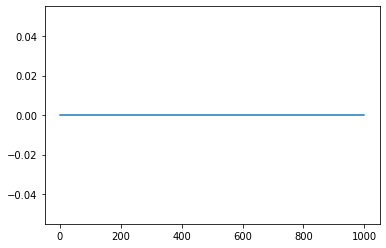

In [7]:
#Plot the pulse
d = 1e-8
tau = [0,80-d,80+d,100-d,100+d,120-d,120+d,180-d,180+d,200-d,200+d,220-d,220+d,280-d,280+d,300-d,300+d,320-d,320+d,380-d,380+d,400-d,400+d,420-d,420+d,480-d,480+d,500-d,500+d,520-d,520+d,580-d,580+d,600-d,600+d,620-d,620+d,680-d,680+d,700-d,700+d,720-d,720+d,780-d,780+d,800-d,800+d,820-d,820+d,880-d,880+d,900-d,900+d,920-d,920+d,1000]
plotpulse(tau)


### Instantiate the variables

In [6]:
#Initialise variables.
dt = 2 # time step
N = 2001 # spatial dimension size
n = 100 # number of time steps
t = torch.linspace(0,n*dt,n+1) # time
m = 5 # Krylov subspace dimension
A,v,dt,dx,x,V0 = init(dt,N) # Schrodinger equation variables
directory = "Schrodinger_data/SH/"

### Save and Load the variables

In [23]:
#Save variables
vars = {'A':A,
        'v':v,
        'dt':dt,
        'dx':dx,
        'x':x,
        'V0':V0,
        'n':n,
        't':t,
        'm':m,
        'N':N}
with open(directory+"Variables.pkl",'wb') as f:
    pickle.dump(vars,f)
# torch.save(A,directory+"A.pt")
# torch.save(v,directory+"v.pt")
# torch.save(dt,directory+"dt.pt")
# torch.save(dx,directory+"dx.pt")
# torch.save(x,directory+"x.pt")
# torch.save(V0,directory+"V0.pt")
# torch.save(n,directory+"n.pt")
# torch.save(t,directory+"t.pt")
# torch.save(m,directory+"m.pt")

In [2]:
#Load variables
directory = "Schrodinger_data/SH/"
with open(directory+"Variables.pkl",'rb') as f:
    vars = pickle.load(f)
A = vars['A']
v = vars['v']
dt = vars['dt']
dx = vars['dx']
x = vars['x']
V0 = vars['V0']
n = vars['n']
t = vars['t']
m = vars['m']
N = vars['N']
# A = torch.load(directory+"A.pt")
# v = torch.load(directory+"v.pt")
# N = len(v)
# dt = torch.load(directory+"dt.pt")
# dx = torch.load(directory+"dx.pt")
# x = torch.load(directory+"x.pt")
# V0 = torch.load(directory+"V0.pt")
# n = torch.load(directory+"n.pt")
# t = torch.load(directory+"t.pt")
# m = torch.load(directory+"m.pt")

#### Plot the potential

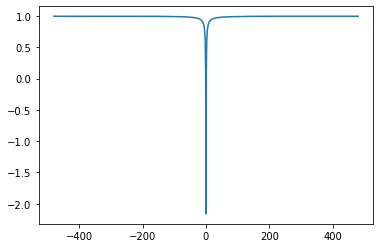

In [3]:
# Plot the potential
plt.plot(x,V0.real)
# plt.xlim([-1,1])

# Define functions to compute the local and global error as well as observables

The local error at time $t_{k+1}$ is given by equation (4.3) in the paper
$$
\|\mathcal{L}(\tau)\| = \|\hat{v}(\tau) - \tilde{v}(\tau)\|,
$$
where $\hat{v}(\tau)$ is the single-step approximation to the solution of the Schrodinger equation with time step $\tau = t_{k+1}-t_k$, and $\tilde{v}(\tau)$ is the single-step reference solution. The initial vector is $v = \hat{v}(t_k)$, the approximate solution at time $t_k$, and exponent matrix is $A=A(t_k)$.

In [12]:
#local error
def compute_LE(t,sols,dx):
    #Initialise vector containing local error over time
    LE = torch.zeros((len(t)-1,),dtype = torch.float64)
    # Record time at start
    t0 = time.time()
    #Compute local errors
    for i in range(len(t)-1):
        #Compute reference solution at next time step
        M = dt*(A-1j*e(t[i])*torch.diag(x))
        ref = Krylov.prop.Pade_propagator(M,sols[:,i])
        #Compute L2 norm of the error vector
        LE[i] = Krylov.L2.Error(ref,sols[:,i+1],dx)
        #Record time after i+1 iterations
        t1 = time.time()
        #Compute estimated time to complete
        eta = (t1-t0)*(t[-1] - t[i])/t[i+1]
        #Print progress
        print('t = {0:<4.2f} - eta {1:>02d}:{2:>02d}:{3:>02d}'.format(t[i],math.floor(eta/(60**2)),math.floor((eta%(60**2))/60),math.floor(eta%60)),end='\r')
    return LE

The global error at time $t_{k+1}$ is given by equation (4.4) in the paper
$$
\|\mathcal{L}(t_{k+1})\| = \|\hat{v}(t_{k+1}) - \tilde{v}(t_{k+1})\|,
$$
where $\hat{v}(t_{k+1})$ is the multi-step approximation to the solution of the Schrodinger equation, and $\tilde{v}(t_{k+1})$ is the multi-step reference solution. The initial vector is $v = u_0$.

In [11]:
#global error
def compute_GE(refs,sols,dx):
    #Initialise vector containing local error over time
    GE = torch.zeros((len(refs[0,:])-1,),dtype = torch.float64)
    #Compute ratio of number of time steps
    N1 = len(refs[0,:])-1
    N2 = len(sols[0,:])-1
    dt_factor = int(N2/N1)
    #Compute L2 norm of the error vectors
    for i in range(1,len(refs[0,:])):
        GE[i-1] = Krylov.L2.Error(refs[:,i],sols[:,dt_factor*i],dx)
    return GE

The observables are calculated by the inner product given in equation (4.18). The specific equations for the kinetic and potential are given in equation (4.17). We denote the potential energy by $E_V$, the kinetic energy by $E_K$ and the total energy by $E_T$. The observables at time $t_k$ are give by
$$
E_V(t_k) = (\hat{v}(t_k),\mathrm{diag}(V)\hat{v}(t_k)), \quad E_K(t_k) = (\hat{v}(t_k), \nabla \hat{v}(t_k)), \quad E_T = E_V + E_K, \quad \|\hat{v}(t_k)\| = \sqrt{ (\hat{v}(t_k),\hat{v}(t_k))}
$$
where $\hat{v}(\tau)$ is the single-step approximation to the solution of the Schrodinger equation with time step $\tau = t_{k+1}-t_k$with initial vector is $v = \hat{v}(t_k)$, the approximate solution at time $t_k$.

In [ ]:
#energy and norm
def compute_NRG(sols,dx):
    #Compute laplacian finite difference matrix
    N = len(sols[:,0])
    Laplacian = torch.tensor((torch.diag(torch.ones(N-1,),-1)+torch.diag(-2*torch.ones(N,))+torch.diag(torch.ones(N-1,),1))*(dx**-2),dtype=torch.complex128)
    #Initialise vectors to store potential and kinetic energies
    n = len(sols[0,:])
    pot = torch.zeros((n,),dtype = torch.float64)
    kin = torch.zeros((n,),dtype = torch.float64)
    nrm = torch.zeros((n,),dtype = torch.float64)
    for i in range(len(sols[0,:])):
        pot[i] = Krylov.L2.IP(sols[:,i],torch.diag(V0) @ sols[:,i],dx).real
        kin[i] = Krylov.L2.IP(sols[:,i],-Laplacian @ sols[:,i],dx).real
        nrm[i] = Krylov.L2.IP(sols[:,i],sols[:,i],dx).real
    tot = pot + kin
    return pot, kin, tot, nrm

# Compute reference solution by brute force
The reference solution is computed by time-stepping the Pade method built in to torch.matrix_exp().

### Generate the reference solution using expm

In [5]:
#Compute reference solution
import time
def compute_ref(t,dt,v):
    #Initialise list of solutions
    sols = torch.zeros((len(v),len(t)),dtype = v.dtype)
    sols[:,0] = v
    #Record start time of integration
    t0 = time.time()
    #Begin time integration
    for i in range(len(t)-1):
        #Compute Hamiltonian at time t[i]
        M = dt*(A-1j*e(t[i])*torch.diag(x))
        #Compute solution at next time step by Pade
        sols[:,i+1] = Krylov.prop.Pade_propagator(M,sols[:,i])
        #Record time after i+1 time steps
        t1 = time.time()
        #Compute estimated time to complete
        eta = (t1-t0)*(t[-1] - t[i+1])/t[i+1]
        #Print progress
        print('t = {0:<4.2f} - eta {1:>02d}:{2:>02d}:{3:>02d}'.format(t[i+1],math.floor(eta/(60**2)),math.floor((eta%(60**2))/60),math.floor(eta%60)),end='\r')
    return sols
tau = torch.linspace(0,1000,1001)
glo_ref = compute_ref(tau,tau[1]-tau[0],v)
torch.save(glo_ref,directory+"animation_frames.pt")

### Save and load the reference solution

In [ ]:
#Save reference solution
torch.save(glo_ref,directory+"reference.pt")

In [9]:
#Load reference solution
glo_ref = torch.load(directory+"reference.pt")

### Plot the family of solutions on the time domain

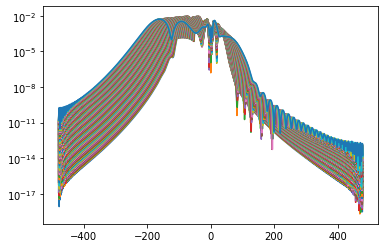

In [13]:
# Plot the family of wavefunctions in the time domain
for i in range(len(glo_ref[1,:])):
    plt.plot(x,torch.abs(glo_ref[:,i])**2)
plt.yscale('log')

# Compute the polynomial Krylov approximation
The polynomial Krylov approximation is computed by time stepping using the approximation equation (2.2) in the paper,
$$
\mathrm{e}^{\tau A}v \approx \beta V_m \mathrm{e}^{\tau H_m}e_1.
$$
Here $beta = \|v\|$, and $V_m$ and $H_m$ are obtained through the Arnoldi algorithm (1) with $X = A$.

### Generate the polynomial Krylov approximation with time step of dt/dt_factor

In [ ]:
#Compute polynomial Krylov approximation
def compute_polyK(t,v,m,dx):
    #Compute new time grid
    # new_t = torch.linspace(t[0],t[-1],dt_factor*(len(t)-1)+1)
    #Initialise list of solutions
    sols = torch.zeros((len(v),len(t)),dtype = v.dtype)
    sols[:,0] = v
    #Record start time of integration
    t0 = time.time()
    #Begin time integration
    for i in range(len(t)-1):
        #Compute Hamiltonian at time t[i]
        M = (t[1]-t[0])*(A-1j*e(t[i])*torch.diag(x))
        #Compute solution at next time step by polynomial Krylov
        sols[:,i+1] = Krylov.prop.PolyK_propagator(M,sols[:,i],m,dx)
        #Record time after i+1 time steps
        t1 = time.time()
        #Compute estimated time to complete
        eta = (t1-t0)*(t[-1] - t[i+1])/t[i+1]
        #Print progress
        print('t = {0:<4.2f} - eta {1:>02d}:{2:>02d}:{3:>02d}'.format(t[i+1],math.floor(eta/(60**2)),math.floor((eta%(60**2))/60),math.floor(eta%60)),end='\r')
    return sols
#Define the factor to decrease the time step size
dt_factor = 20
newt = torch.linspace(t[0],t[-1],dt_factor*n + 1)
#Compute the solution
poly_sols = compute_polyK(newt,v,m,dx)

### Save and load the polynomial Krylov approximation

In [ ]:
#save the results
torch.save(poly_sols,directory+"polyK_sols_dtby"+str(dt_factor)+".pt")

In [ ]:
#Load polynomial Krylov approximation
dt_factor = 1
poly_sols = torch.load(directory+"polyK_sols_dtby"+str(dt_factor)+".pt")

### Compute and plot the polynomial Krylov global error

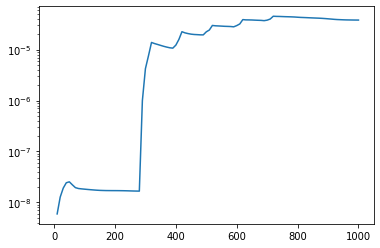

In [ ]:
#Compute and plot the global error
poly_ref = compute_ref(newt,newt[1]-newt[0],v)
poly_GE = compute_GE(glo_ref,poly_sols,dx)
torch.save(poly_GE,directory+"poly_GE_dtby"+str(dt_factor)+".pt")
ploterror(t,poly_GE,filename = "poly_GE_dtby"+str(dt_factor)+".tex")

# Compute the shift-and-invert Krylov approximation
The shift-and-invert Krylov approximation is computed by time stepping using the approximation equation (2.6) (for the shift-inverted approach proptype = "SI") or equation (2.7) (for the Rayleigh approach proptype "RQ") in the paper,
$$
\mathrm{e}^{\tau A}v \approx \beta V_m \mathrm{e}^{\tau A_m}e_1.
$$
Here $beta = \|v\|$, and $A_m$ is defined as equation (2.5)
$$
A_m = H_m^{-1} + \alpha I
$$
for the shift-inverted approach. For the Rayleigh approach $A_m$ is given by equation (2.10) if $A$ is not skew-Hermitian
$$
A_m = (H_{m}^{-1} + \alpha I) - h_{m+1,m} (V_m, A v_{m+1}) e_m^\top H_{m}^{-1},
$$
or equation (2.15) if $A$ is skew-Hermitian
$$
A_m = (H_{m}^{-1} + \alpha I) + h_{m+1,m}^2 (\kappa + \overline{\alpha}) y_m y_m\mathsf{H}, \quad \kappa = \left( v_{m+1},Av_{m+1} \right), \ y_m\mathsf{H} = \boldsymbol{e}_m^\top H_{m}^{-1}
$$
$V_m, H_m,v_{m+1}$ and $h_{m+1,m}$ are obtained through the Arnoldi algorithm (1) with $X = (A-\alpha I)^{-1}$.

The shifts are computed by minimising equation (3.8) for the shift-inverted approach, $\alpha^* = \argmin_\alpha{\int_0^\tau\|\mathcal{R}_{SI}(s)\|\,\mathrm{d}s}$,
$$
\int_0^\tau\|\mathcal{R}_{SI}(s)\|\,\mathrm{d}s
= \beta h_{m+1,m} \|(A - \alpha I) v_{m+1}\| \int_0^\tau |e_m^\top H_m^{-1} \mathrm{e}^{s S_m} e_1| \,\mathrm{d}s.
$$
by minimising equation (3.11) for the Rayleigh approach when $A$ is not skew-Hermitian, $\alpha^* = \argmin_\alpha{\int_0^\tau\|\mathcal{R}_{RA}(s)\|\,\mathrm{d}s}$
$$
\int_0^\tau\|\mathcal{R}_{RA}(s)\|\,\mathrm{d}s
= \beta h_{m+1,m} \|(A - \alpha I)v_{m+1} - V_m(V_m,Av_{m+1})\| \int_0^\tau |y_m\mathsf{H} \mathrm{e}^{s A_m} e_1| \,\mathrm{d}s,
$$
or by minimising equation (3.13a) for the Rayleigh approach when $A$ is skew-Hermitian, $\alpha^* = \argmin_\alpha{\int_0^\tau\|\mathcal{R}_{RA}(s)\|\,\mathrm{d}s}$
$$
\int_0^\tau\|\mathcal{R}_{RA}(s)\|\,\mathrm{d}s
= \beta h_{m+1,m} \chi
 \int_0^\tau |y_m^\mathsf{H} \mathrm{e}^{s A_m} e_1| \,\mathrm{d}s,
$$

$$
\chi = \left(\|(A - \alpha I) v_{m+1}\|^2 -(h_{m+1,m}|\kappa + \overline{\alpha}| \|y_m\|_2)^2\right)^{1/2}.
$$

### Define function to execute the time integration using the shift-invert Krylov method

In [9]:
#Compute SI solution
def compute_SIK(t,dt,v,m,dx,proptype,opttype,surrogate_size,maxiter,ftol,shift = None):
    #Initialise list of solutions
    sols = torch.zeros((len(v),len(t)),dtype = v.dtype)
    sols[:,0] = v
    #Initialise variables to store shifts, number of iterations, and objective function value over time
    shifts = torch.zeros((len(t)-1,),dtype = torch.complex128)
    iters = torch.zeros((len(t)-1,),dtype = torch.int64)
    objective = torch.zeros((len(t)-1,),dtype = torch.float64)
    #Record start time of integration
    t0 = time.time()
    #Initialise first guess for shift
    if os.path.isfile(directory+"initial_shift.pt"):
        x0flt = torch.load(directory+"initial_shift.pt")
        x0 = [x0flt.real,x0flt.imag]
        # x0 = None
    else:
        x0 = None
    #Initialise the time-independent part of the surrogate Hamiltonian
    As,vs,dts,dxs,xs,V0s = init(dt,surrogate_size)
    #Begin time integration
    for i in range(len(t)-1):
        #Record time after i+1 time steps
        t1 = time.time()
        #Compute estimated time to complete
        eta = (t1-t0)*(t[-1] - t[i])/t[i+1]
        #Print progress
        print('t = {0:<4.2f} - eta {1:>02d}:{2:>02d}:{3:>02d}'.format(t[i],math.floor(eta/(60**2)),math.floor((eta%(60**2))/60),math.floor(eta%60)),end='\n')
        #Compute true Hamiltonian at time t[i]
        M = dt*(A-1j*e(t[i])*torch.diag(x))
        #Compute surrogate Hamiltonian at time t[i]
        Ms = dt*(As-1j*e(t[i])*torch.diag(xs))
        # print(len(Ms))
        #Compute surrogate vector
        vs = Krylov.resample.downsample1D(sols[:,i],surrogate_size,[x[0],x[-1]])
        # print(len(vs))
        #Compute solution at next time step by Pade
        sols[:,i+1],opt_data = Krylov.prop.SIK_propagator(true_A = M,
                                                true_v = sols[:,i],
                                                true_dx = dx,
                                                surrogate_A = Ms,
                                                surrogate_v = vs,
                                                surrogate_dx = dxs,
                                                m = m,
                                                proptype = proptype,
                                                opttype = proptype+'_'+opttype,
                                                maxiter=maxiter,
                                                ftol=ftol,
                                                opt_bounds=[(0,100),(-100,0)],
                                                x0=x0,
                                                shift = shift,
                                                rand_n = 30,
                                                reorth_iters = 0)
        #Save random initial guesses for shift as well as best initial guess
        if x0==None and i==0 and shift == None:
            torch.save(opt_data['random_shifts'],directory+"random_shifts.pt")
            torch.save(opt_data['shifts'][0],directory+"initial_shift.pt")
        #Use best shift as initial guess for the next time step
        x0 = [opt_data['shifts'][-1].real,opt_data['shifts'][-1].imag]
        #Use best shift as shift for next time step        
        shift = opt_data['shifts'][-1]

        #Record shifts, number of iterations and objective function value
        shifts[i] = opt_data['shifts'][-1]
        if shift == None:
            iters[i] = len(opt_data['shifts'])-1
            objective[i] = opt_data['objective'][-1]
        #Clear outputs
        time.sleep(1)
        clear_output(wait=True)
    #Collect optimiser data into a dict
    optimiser_data = {'shifts':shifts,
                      'iterations':iters,
                      'objective':objective}
    return sols, optimiser_data

### Generate the shift-and-invert Krylov approximation

In [12]:
#Compute shift-invert Krylov solutions
proptype = "SI" # "SI" for shift-inverted or "RQ" for Rayleigh approach
opttype = "defect" # "defect" for defect integral objective function or "l2" for error norm objective function
surrogate_size = len(v)
maxiter = 15
ftol =3e-13
# m = 25
# Optimise the shift
SIK_sols, optimiser_data = compute_SIK(t,dt,v,m,dx,proptype,opttype,surrogate_size,maxiter,ftol) 
# Compute with fixed shift
# opttype = "NoOpt"
# SIK_sols, optimiser_data = compute_SIK(t,dt,v,m,dx,proptype,opttype,surrogate_size,maxiter,ftol,shift = 46.54-27.26j) 

import winsound
winsound.PlaySound("SystemHand", winsound.SND_ALIAS)


t = 198.00 - eta 00:00:07


### Save and load shift-invert Krylov data

In [ ]:
#Save outputs
surrogate_type = "no_surrogate"
torch.save(SIK_sols,directory+surrogate_type+"/"+proptype+"/SIK_sols_"+opttype+".pt")
with open(directory+surrogate_type+"/"+proptype+"/optimiser_data_"+opttype+".pkl",'wb') as f:
    pickle.dump(optimiser_data,f)

In [ ]:
#Load solutions and optimiser data
proptype = "SI" # "SI" for shift-inverted or "RQ" for Rayleigh approach
opttype = "defect" # "defect" for defect integral objective function or "l2" for error norm objective function
surrogate_type = "no_surrogate" # "no_surrogate" for optimising on the true problem or "surrogate" for optimising on the surrogate problem
SIK_sols = torch.load(directory+surrogate_type+"/"+proptype+"/SIK_sols_"+opttype+".pt")
with open(directory+surrogate_type+"/"+proptype+"/optimiser_data_"+opttype+".pkl",'rb') as f:
    optimiser_data = pickle.load(f)

# Generate plots

### Plot the difference in norm to the reference solution

### Plot change in norm from the initial vector

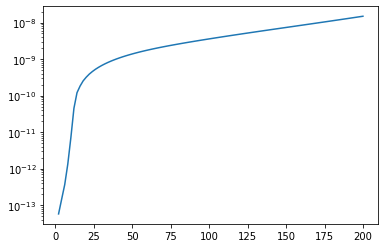

In [13]:
#Plot norm change
diff = torch.zeros((len(t)-1,))
for i in range(1,len(t)):
    diff[i-1] = torch.abs(Krylov.L2.Norm(SIK_sols[:,0],dx) - Krylov.L2.Norm(SIK_sols[:,i],dx))
plt.plot(t[1:],diff)
plt.yscale('log')
tikz.save(directory + "SI_norm_diff.tex")

### Plot the local error

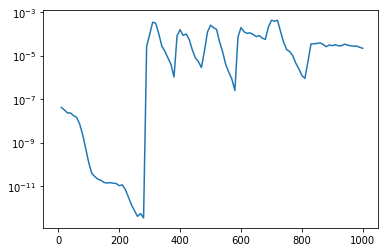

In [ ]:
#Local error
LE = compute_LE(t,SIK_sols,dx)
torch.save(LE,directory+surrogate_type+"/"+proptype+"/SIK_LE_"+opttype+".pt")
ploterror(t,LE,filename = surrogate_type+"/"+proptype+"/SIK_LE_"+opttype+".tex")

### Plot the global error

C:\Users\mt767\AppData\Local\Temp\ipykernel_15108\1864874111.py:11: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ..\aten\src\ATen\native\Copy.cpp:250.)
  GE[i-1] = Krylov.L2.Error(refs[:,i],sols[:,dt_factor*i],dx)


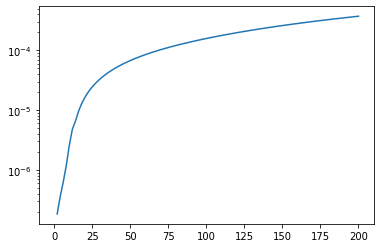

In [ ]:
#Global error
GE = compute_GE(glo_ref,SIK_sols,dx)
torch.save(GE,directory+surrogate_type+"/"+proptype+"/SIK_GE_"+opttype+".pt")
ploterror(t,GE,filename = surrogate_type+"/"+proptype+"/SIK_GE_"+opttype+".tex")

### Plot the energies

In [ ]:
#Energies
PE,KE,TE = compute_NRG(SIK_sols,dx)
torch.save(LE,directory+surrogate_type+"/"+proptype+"/SIK_PE_"+opttype+".pt")
torch.save(LE,directory+surrogate_type+"/"+proptype+"/SIK_KE_"+opttype+".pt")
torch.save(LE,directory+surrogate_type+"/"+proptype+"/SIK_TE_"+opttype+".pt")
plotenergy(t,PE,KE,TE,filename=surrogate_type+"/"+proptype+"/SIK_PE_"+opttype+".tex")

C:\Users\mt767\AppData\Local\Temp\ipykernel_3884\529446653.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Laplacian = torch.tensor((torch.diag(torch.ones(N-1,),-1)+torch.diag(-2*torch.ones(N,))+torch.diag(torch.ones(N-1,),1))*(dx**-2),dtype=torch.complex128)


# Plot optimisation data

### Plot the number of iterations at each time step

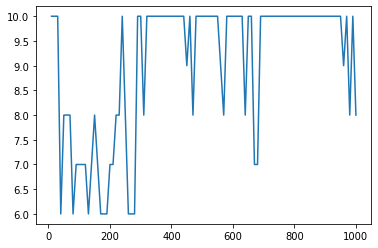

In [ ]:
#Iterations
iters = optimiser_data['iterations']
plotiterations(t,iters,filename = surrogate_type+"/"+proptype+"/SIK_iters_"+opttype+".tex")

### Plot the shifts over time

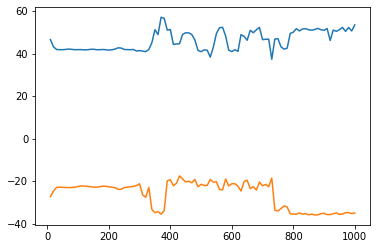

In [ ]:
#shifts
shifts = optimiser_data['shifts']
plotshifts(t,shifts,filename = surrogate_type+"/"+proptype+"/SIK_shifts_"+opttype+".tex")

### Plot the value of the defect integral over time

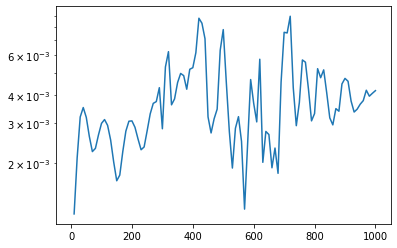

In [ ]:
#defect integral
objective = optimiser_data['objective']
ploterror(t,objective,filename = surrogate_type+"/"+proptype+"/SIK_objective_"+opttype+".tex")

# Compute and plot contours of the defect-integral

### Define function to compute the defect-integral

In [ ]:
#Parameter sweep
def Sweep(gammaR,gammaI,A,v,m,dx,loss_fn):
    loss = torch.zeros((len(gammaI),len(gammaR)),dtype = torch.float64)
    t0 = time.time()
    for i in range(len(gammaI)):
        for j in range(len(gammaR)):
            loss[i,j] = Krylov.Optimise.loss(A,v,1,dx,m,[gammaR[j],gammaI[i]],loss_fn)
            t1 = time.time()
            eta = (t1-t0)*(len(gammaR)*len(gammaI) - (i*len(gammaR) + j))/(i*len(gammaR) + j+1)
            print('index [{0:02d},{1:02d}] - eta {2:02d}:{3:02d}:{4:02d}'.format(i,j,math.floor(eta/(60**2)),math.floor((eta%(60**2))/60),math.floor(eta%60)), end = '\r')
    return loss



In [ ]:
#Contour plot
import tikzplotlib as tikz
def Contour(gammaR,gammaI,loss,shifts = [0],randshifts = [0],optshift = [0],Filename = "Contour.tex"):
    hold = torch.nan_to_num(loss,nan=1e0)
    # if torch.log10(torch.max(hold)) < -2:
    levels = torch.logspace(torch.log10(torch.max(torch.tensor([torch.min(hold),1e-15]))),min(0,torch.log10(torch.max(hold))),15)
    # else:
    #     levels = torch.logspace(torch.floor(torch.log10(torch.min(hold))),torch.ceil(torch.log10(torch.max(hold))),int(1+torch.ceil(torch.log10(torch.max(hold)))-torch.floor(torch.log10(torch.min(hold)))))
    cont = plt.contour(gammaR,gammaI,loss,levels,norm=LogNorm())
    fmt = '%1.1e'  # Exponential format
    plt.clabel(cont, inline=True, fontsize=8, fmt=fmt, colors='black', manual=False, inline_spacing=3)
    # plt.title("Rayleigh")
    if optshift != [0]:
        marker = ['o','s']
        for i in range(len(optshift)):
            plt.plot(optshift[i].real,optshift[i].imag,marker = marker[i],color = 'k')
    if randshifts != [0]:
        plt.plot(randshifts.real,randshifts.imag,'^',color = [0,0.2,0.8])
    if shifts != [0]:
        col = [1,0.1,0.2]#],[0,0.6,0.1]
        for i in range(len(shifts)):
            plt.plot(shifts[i].real,shifts[i].imag,'x',color = 'r')
            # for j in range (len(shifts[i])+1):
        for i in range(len(shifts)-1):
            plt.arrow(shifts[i].real,shifts[i].imag,shifts[i+1].real - shifts[i].real,shifts[i+1].imag - shifts[i].imag,linestyle = (3,(3,6)),color = 'k',head_length = 0)
    tikz.save("Schrodinger_data/"+Filename)

### Generate the contour plot

In [3]:
#Generate contour plot
gammaN = 31
gammaR = torch.linspace(0,100,gammaN)
gammaI = torch.linspace(-50,0,gammaN)

proptype = "SI" # "SI" for shift-inverted or "RQ" for Rayleigh approach
opttype = "defect" # "defect" for defect integral objective function or "l2" for error norm objective function
N0 = 2501
A0,u0,dt,dx0,x0,V0 = init(dt,N0) # Schrodinger equation variables
v0 = Krylov.resample.downsample1D(v,N0,[-240,240])

loss = Sweep(gammaR,gammaI,dt*A0,v0,m,dx0,proptype+"_"+opttype)
Contour(gammaR,gammaI,loss,Filename = "Contour_N="+str(N0)+".tex")

NameError: name 'torch' is not defined